# Converting tabular data to a graph-strucutred data

This dataset contains information about 10 selected soccer players including player name, age, nationality, club and soccer league. A complete FIFA dataset can be downloaed from <a href="https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset">Kaggle</a>.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read data from a dictionary
data={'Player':['L. Messi','R. Lewandowski','C. Ronaldo','Neymar Jr','K. Mbappé','E. Haaland','H. Kane','Luka Modrić','L. Goretzka','M. Salah'],
      'Age':[36,34,38,22,24,35,29,37,28,31],
      'Nationality':['Argentina','Poland','Portugal','Brazil','France','Norway','England','Croatia','Germany','Egypt'],
      'Club':['Inter Miami','Barcelona','Al-Nassr','Al-Hilal ','PSG','Manchester City','Tottenham Hotspur','Real Madrid','Bayern Munich','Liverpool'],
      'League':['Major League Soccer ','Spain Primera Division','Saudi Arabia League','Saudi Arabia League','French Ligue 1','English Premier League','English Premier League','Spain Primera Division','German 1. Bundesliga','English Premier League']}
df=pd.DataFrame.from_dict(data)
df

,Player,Age,Nationality,Club,League
0,L. Messi,36,Argentina,Inter Miami,Major League Soccer
1,R. Lewandowski,34,Poland,Barcelona,Spain Primera Division
2,C. Ronaldo,38,Portugal,Al-Nassr,Saudi Arabia League
3,Neymar Jr,22,Brazil,Al-Hilal,Saudi Arabia League
4,K. Mbappé,24,France,PSG,French Ligue 1
5,E. Haaland,35,Norway,Manchester City,English Premier League
6,H. Kane,29,England,Tottenham Hotspur,English Premier League
7,Luka Modrić,37,Croatia,Real Madrid,Spain Primera Division
8,L. Goretzka,28,Germany,Bayern Munich,German 1. Bundesliga
9,M. Salah,31,Egypt,Liverpool,English Premier League


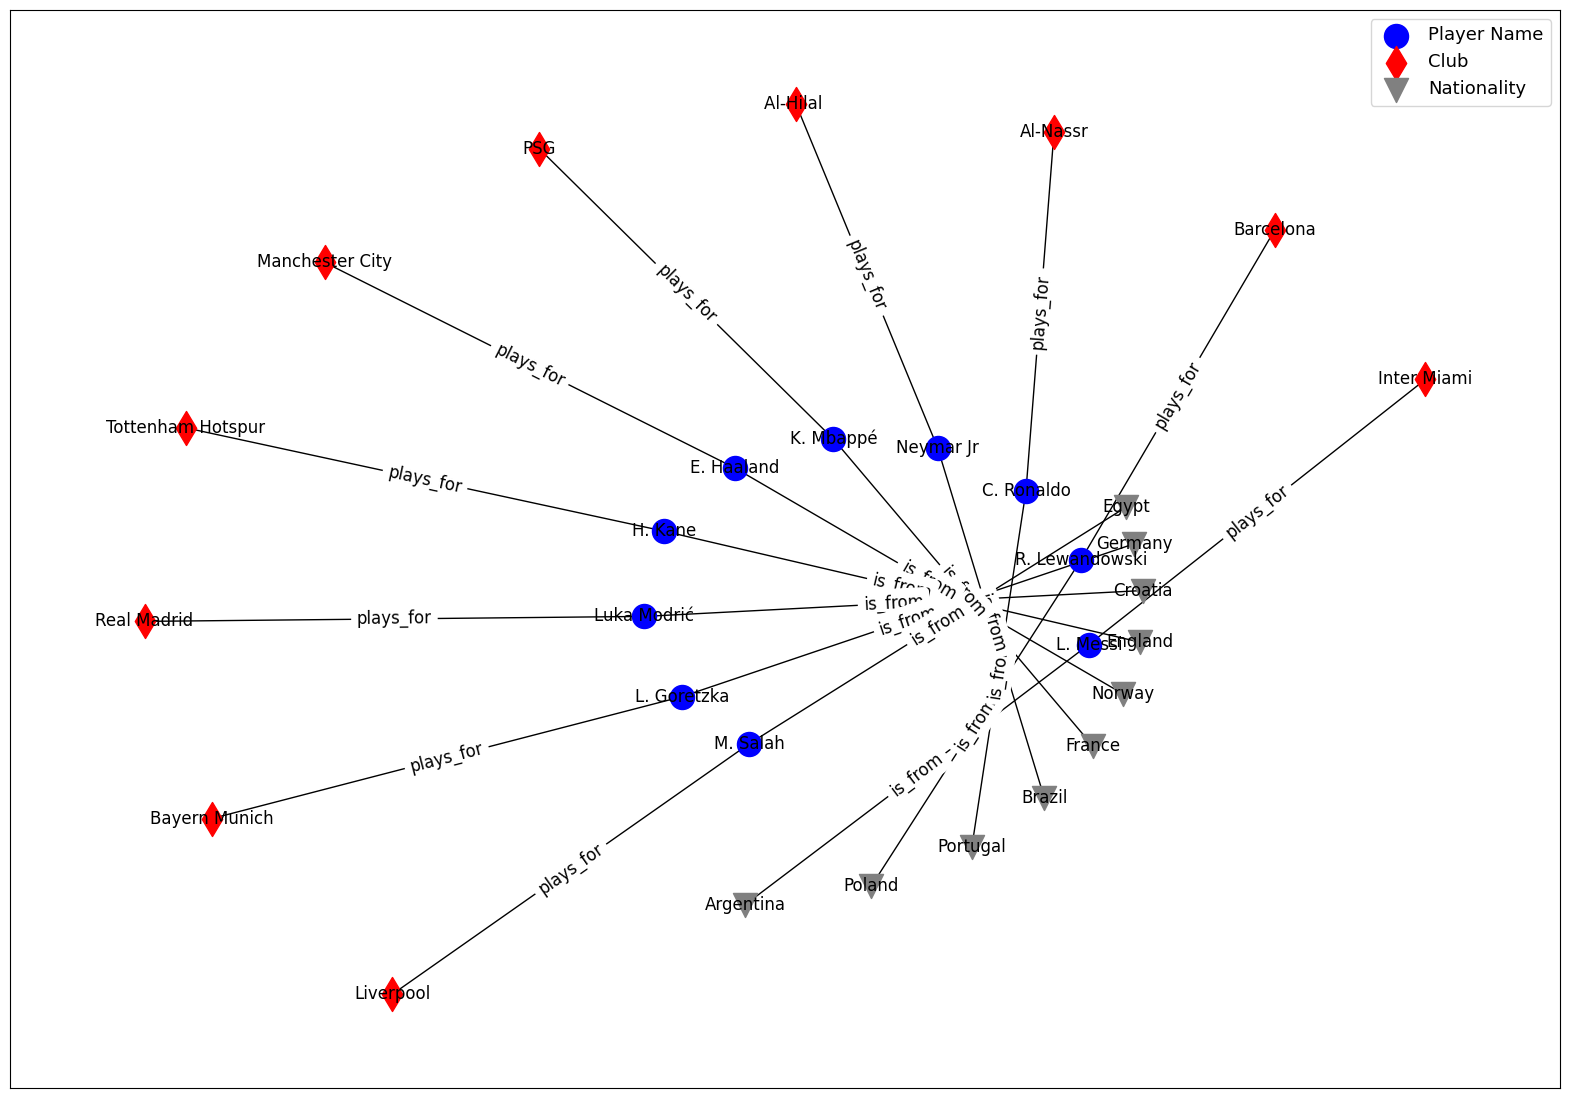

In [2]:
# Create a new graph
G = nx.Graph()

# Add nodes and edges for clubs
for index, row in df.iterrows():
    G.add_edge(row['Player'], row['Club'], relationship='plays_for')

# Add nodes and edges for nationalities
for index, row in df.iterrows():
    G.add_edge(row['Player'], row['Nationality'], relationship='is_from')

# Create the layout
pos = nx.kamada_kawai_layout(G)

# Set the size of the figure
plt.figure(figsize=(20, 14))

# Get lists of player, club and nationality nodes
player_nodes = df['Player'].unique().tolist()
club_nodes = df['Club'].unique().tolist()
nationality_nodes = df['Nationality'].unique().tolist()

# Draw nodes in different colors
nx.draw_networkx_nodes(G, pos, nodelist=player_nodes, node_color='blue', label='Player Name', node_shape='o')
nx.draw_networkx_nodes(G, pos, nodelist=club_nodes, node_color='red', label='Club', node_shape='d')
nx.draw_networkx_nodes(G, pos, nodelist=nationality_nodes, node_color='gray', label='Nationality', node_shape='v')

# Draw edges
nx.draw_networkx_edges(G, pos)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'relationship')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Draw node labels
nx.draw_networkx_labels(G, pos)

# Add a legend
plt.legend(fontsize=13, loc='upper right')

# Display the graph
plt.show()
# plt.savefig('CH11_F04_tab2graph.png', dpi=300, bbox_inches='tight')